In [1]:
import numpy
from galpy import potential
from galpy.orbit import Orbit
from galpy.util import bovy_coords
import mwstreams.GD1
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Figure 13 of Koposov et al. (2013)?!?

Let's put the initial condition in a proper Galactocentric coordinate frame...

In [2]:
X0= [3.41,13.00,9.58]
Xd0= [200.4,-162.6,13.9]

In [3]:
R,phi,Z= bovy_coords.rect_to_cyl(X0[0],X0[1],X0[2])
vR,vT,vz= bovy_coords.rect_to_cyl_vec(Xd0[0],Xd0[1],Xd0[2],R,phi,Z,cyl=True)

In [4]:
ro= 8.5
vo= 220.
obs= [ro,0.,0.]

In [5]:
o= Orbit([R/ro,vR/vo,vT/vo,Z/ro,vz/vo,phi])
ts= numpy.linspace(0.,3.,1001)
lp= potential.LogarithmicHaloPotential(normalize=1.,q=0.9)
o.integrate(ts,lp)

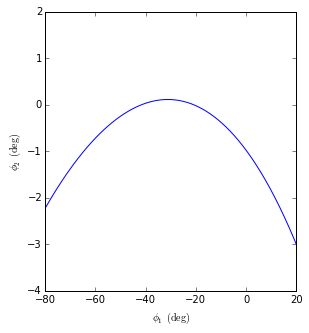

In [6]:
figsize(4.5,5)
phi12= mwstreams.GD1.lb_to_phi12(o.ll(ts,obs=obs,ro=ro),o.bb(ts,obs=obs,ro=ro),degree=True)
phi12[phi12[:,0] > 180,0]-= 360.
pyplot.plot(phi12[:,0],phi12[:,1])
xlim(-80,20)
ylim(-4,2)
xlabel(r'$\phi_1\,(\mathrm{deg})$')
ylabel(r'$\phi_2\,(\mathrm{deg})$')